# Project setup

In [1]:
!pip install h2o -q -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Import libraries
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h2o
from h2o.automl import H2OAutoML

In [3]:
# Print version numbers of the libraries as well as the environment
print(f"System platform {sys.platform}")
print(f"Python version {sys.version}")
print("-------------------------------")
print(f"Pandas version {pd.__version__}")
print(f"Numpy version {np.__version__}")
print(f"Matplotlib version {matplotlib.__version__}")
print(f"h2o version {h2o.__version__}")

System platform linux
Python version 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
-------------------------------
Pandas version 2.2.2
Numpy version 1.26.4
Matplotlib version 3.10.0
h2o version 3.46.0.6


In [6]:
# Initialise h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4h_mt064
  JVM stdout: /tmp/tmp4h_mt064/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4h_mt064/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_bmhxux
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Data

In [25]:
df = pd.read_csv("height_prediction.csv")
df.head()

,age,gender,mean_ulna,mean_height
0,51,Male,29.0,164.3
1,53,Male,29.0,168.1
2,69,Female,24.0,161.0
3,57,Male,29.0,164.1
4,66,Male,31.0,171.0


In [7]:
df.describe()

,age,mean_ulna,mean_height
count,474.000000,474.000000,474.000000
mean,50.647679,27.883017,162.644937
std,17.298044,1.976854,8.297137
min,18.000000,23.200000,138.900000
25%,36.250000,26.500000,157.000000
50%,53.000000,28.000000,161.575000
75%,65.000000,29.000000,167.775000
max,90.000000,34.500000,190.000000


In [26]:
# Log trainsform features
df_t = df.copy()
df_t["mean_ulna"] = np.log(df_t["mean_ulna"])
df_t["age"] = np.log(df_t["age"])

<Axes: ylabel='Frequency'>

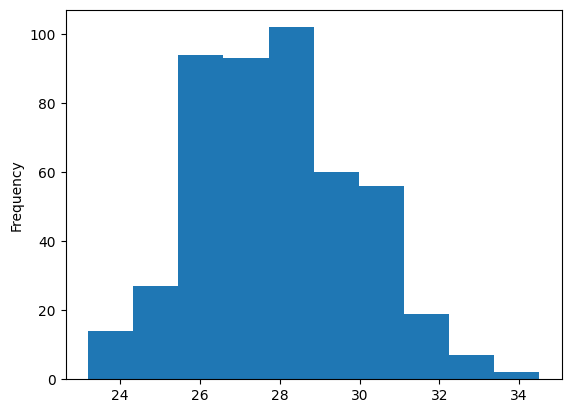

In [31]:
df["mean_ulna"].plot(kind="hist")

In [8]:
# Specify target
y = "mean_height"

In [11]:
# Convert dataframe into H2O frame
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
df_t = h2o.H2OFrame(df_t)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
# Run AutoML on full dataset
aml = H2OAutoML(max_runtime_secs=300, seed = 1, project_name="Height_Prediction")
aml.train(y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20250209_224643_model_1


Status of Neuron Layers: predicting mean_height, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.4 KB, 786,840 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        5        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.21264095828903373   0.40094292163848877  0.0         -0.028180199181544595  0.20731931924819946  0.33117998816909955  0.2160329818725586
    3        1        Linear                       0.0   0.0   0.000830797393573448  0.00073291826993227  0.0         -0.030978452172130345  0.12445646524429321  -0.1248884132714707  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 22.01285254223953
RMSE: 4.691785645384871
MAE: 3.585723973000791
RMSLE: 0.028596033013910435
Mean Residual Deviance: 22.01285254223953

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 23.18956739415062
RMSE: 4.815554733792424
MAE: 3.7308340287087893
RMSLE: 0.029347396048210028
Mean Residual Deviance: 23.18956739415062

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     3.73084    0.201265    3.85057       3.50313       3.57168       3.99638       3.73243
mean_residual_deviance  23.1876    3.8634      26.4126       19.7491       19.5294       28.0046       22.2422
mse                     23.1876    3.8634      26.4126       19.7491       19.5294       28.0046       22.2422
r2                      0.650497   0.083802    0.557622      0.649362      0.752595      0.579343      0.713561
residual_deviance       23.1876    3.8634      26.4126       19.7491       19.5294       28.0046       22.2422
rmse                    4.80212    0.398712    5.13932       4.444         4.4192        5.29194       4.71616
rmsle                   0.0292661  0.00242277  0.031785      0.027341      0.0266303     0.0317697     0.0288047

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2025-02-09 22:50:05  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2025-02-09 22:50:05  1 min 16.766 sec  40512 obs/sec     10        1             4740       4.81793          23.2125              3.68251         0.662105
    2025-02-09 22:50:10  1 min 21.770 sec  50011 obs/sec     540       54            255960     4.79711          23.0122              3.66799         0.66502
    2025-02-09 22:50:16  1 min 26.871 sec  45014 obs/sec     970       97            459780     4.70247          22.1133              3.59283         0.678106
    2025-02-09 22:50:21  1 min 31.879 sec  51704 obs/sec     1660      166           786840     4.69179          22.0129              3.58572         0.679567

Variable Impor

In [16]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20250209_224643_model_1,4.81555,23.1896,3.73083,0.0293474,23.1896
GLM_1_AutoML_1_20250209_224643,4.81858,23.2187,3.70793,0.0293942,23.2187
StackedEnsemble_BestOfFamily_6_AutoML_1_20250209_224643,4.88835,23.896,3.78277,0.0297546,23.896
DeepLearning_grid_1_AutoML_1_20250209_224643_model_4,4.89297,23.9412,3.82151,0.0298392,23.9412
DeepLearning_1_AutoML_1_20250209_224643,4.90351,24.0444,3.72508,0.029896,24.0444
GBM_grid_1_AutoML_1_20250209_224643_model_25,4.9447,24.45,3.81776,0.0301593,24.45
GBM_grid_1_AutoML_1_20250209_224643_model_3,4.95042,24.5067,3.83887,0.0301893,24.5067
GBM_grid_1_AutoML_1_20250209_224643_model_23,4.96176,24.6191,3.81871,0.0302818,24.6191
XGBoost_grid_1_AutoML_1_20250209_224643_model_21,4.96318,24.6332,3.80767,0.0302897,24.6332
DeepLearning_grid_1_AutoML_1_20250209_224643_model_2,4.9688,24.689,3.77149,0.0302305,24.689


In [17]:
# Train model in 80% Train
splits = df.split_frame(ratios=[0.8], seed=1)
train = splits[0]
test = splits[1]
aml2 = H2OAutoML(max_runtime_secs=300, seed = 1, project_name="Height_Prediction_LB")
aml2.train(y = y, training_frame = train, leaderboard_frame= test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_2_20250209_225657_model_5


Status of Neuron Layers: predicting mean_height, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.4 KB, 307 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight          weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  -------------------  -------------------  --------------------  -----------------------
    1        5        Input             10.0
    2        100      RectifierDropout  40.0       0.0   0.0   0.2164658836061135     0.40233123302459717    0.0         0.00828650931440643  0.13834726810455322  0.4876908128791036    0.03632114827632904
    3        1        Linear                       0.0   0.0   0.0024232816451694814  0.0010494436137378216  0.0         0.00965589880477637  0.14222735166549683  0.027375573028185243  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 28.28770610073384
RMSE: 5.318618815137426
MAE: 4.1717697361126564
RMSLE: 0.0325115513096688
Mean Residual Deviance: 28.28770610073384

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 26.076531281547105
RMSE: 5.1065185088812814
MAE: 3.9727833849436873
RMSLE: 0.03104520467060855
Mean Residual Deviance: 26.076531281547105

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     3.97346    0.168339    3.82166       3.85128       3.99521       4.24637       3.95278
mean_residual_deviance  26.0894    4.0599      22.0748       26.3311       25.0511       32.8022       24.1879
mse                     26.0894    4.0599      22.0748       26.3311       25.0511       32.8022       24.1879
r2                      0.622785   0.0393033   0.646543      0.675882      0.587751      0.620492      0.583255
residual_deviance       26.0894    4.0599      22.0748       26.3311       25.0511       32.8022       24.1879
rmse                    5.09606    0.386595    4.69838       5.13139       5.00511       5.72732       4.91812
rmsle                   0.0309797  0.00238933  0.0286772     0.0306169     0.0307368     0.0349945     0.0298731

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2025-02-09 23:00:44  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2025-02-09 23:00:44  2 min 27.367 sec  34111 obs/sec     0.823056  1             307        5.31862          28.2877              4.17177         0.596774

Variable Importances: 
variable            relative_importance    scaled_importance    percentage
------------------  ---------------------  -------------------  ------------
gender.Male         0.981434               1                    0.261902
gender.Female       0.952946               0.970973             0.2543
mean_ulna           0.93541                0.953106             0.24962
age                 0.877541               0.894142             0.234178
gender.missing(NA)  

In [18]:
aml2.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20250209_225657_model_5,4.453,19.8292,3.46134,0.0269525,19.8292
DeepLearning_grid_1_AutoML_2_20250209_225657_model_3,4.45568,19.8531,3.48431,0.027021,19.8531
GLM_1_AutoML_2_20250209_225657,4.47972,20.0679,3.46167,0.0271539,20.0679
DeepLearning_grid_1_AutoML_2_20250209_225657_model_4,4.49934,20.244,3.50355,0.0272668,20.244
StackedEnsemble_BestOfFamily_6_AutoML_2_20250209_225657,4.52983,20.5194,3.51296,0.0274419,20.5194
DeepLearning_grid_2_AutoML_2_20250209_225657_model_2,4.5748,20.9288,3.59201,0.0278059,20.9288
DeepLearning_grid_1_AutoML_2_20250209_225657_model_11,4.57787,20.9569,3.59349,0.0277127,20.9569
StackedEnsemble_AllModels_6_AutoML_2_20250209_225657,4.6135,21.2843,3.56616,0.027906,21.2843
DeepLearning_1_AutoML_2_20250209_225657,4.66641,21.7754,3.6312,0.0282205,21.7754
XGBoost_lr_search_selection_AutoML_2_20250209_225657_select_grid_model_1,4.67454,21.8513,3.63654,0.0282887,21.8513


In [20]:
y_pred = aml2.predict(test)
y_pred.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
151.593
156.992
174.966
153.343
154.461
155.198
160.332
162.026
169.173
174.966


In [21]:
test["pred"] = y_pred

In [22]:
test[["mean_height", "pred"]]

mean_height,pred
161,151.593
157.6,156.992
168.5,174.966
154,153.343
153,154.461
157.9,155.198
156.7,160.332
160.3,162.026
177.6,169.173
187.6,174.966


In [24]:
perf_train = aml2.leader.model_performance(train)
perf_train

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 23.64735990444126
RMSE: 4.862855118594554
MAE: 3.7313324407660455
RMSLE: 0.029696561558270586
Mean Residual Deviance: 23.64735990444126

In [23]:
perf = aml2.leader.model_performance(test)
perf

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 19.829181832091955
RMSE: 4.4529969494815465
MAE: 3.461336148598478
RMSLE: 0.026952499322973177
Mean Residual Deviance: 19.829181832091955

In [33]:
# Run AutoML on full dataset with log transformation
aml3 = H2OAutoML(max_runtime_secs=300, seed = 1, project_name="Height_Prediction_T")
aml3.train(y = y, training_frame = df_t)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_3_20250209_231612_model_1


Status of Neuron Layers: predicting mean_height, regression, gaussian distribution, Quadratic loss, 701 weights/biases, 12.4 KB, 1,256,100 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight            weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  --------------------  ----------  ---------------------  ------------------  -------------------  -----------------------
    1        5        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.2085677411710785     0.40153825283050537   0.0         -0.030396463881595993  0.2221621870994568  0.24610645917409152  0.2435433268547058
    3        1        Linear                       0.0   0.0   0.0009824992992798797  0.000915879849344492  0.0         -0.06130044884368544   0.200370192527771   -0.325786307610922   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 23.45451781183275
RMSE: 4.842986455879549
MAE: 3.6950221161518035
RMSLE: 0.029374972779169766
Mean Residual Deviance: 23.45451781183275

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 23.20317433401435
RMSE: 4.816967337860445
MAE: 3.6632042617519907
RMSLE: 0.029334520950096726
Mean Residual Deviance: 23.20317433401435

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     3.6632     0.246424    3.76842       3.37564       3.49816       4.01234       3.66145
mean_residual_deviance  23.1997    3.88469     25.814        19.244        20.7579       28.61         21.5727
mse                     23.1997    3.88469     25.814        19.244        20.7579       28.61         21.5727
r2                      0.651088   0.0806079   0.567647      0.658331      0.737032      0.570249      0.722182
residual_deviance       23.1997    3.88469     25.814        19.244        20.7579       28.61         21.5727
rmse                    4.80342    0.39823     5.08075       4.3868        4.55609       5.34883       4.64465
rmsle                   0.0292579  0.00233949  0.0314344     0.0270382     0.0273415     0.0320592     0.0284161

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2025-02-09 23:18:43  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2025-02-09 23:18:44  1 min 16.182 sec  70746 obs/sec     10        1             4740         4.84285          23.4532              3.69758         0.658601
    2025-02-09 23:18:49  1 min 21.260 sec  68227 obs/sec     740       74            350760       4.78711          22.9164              3.66399         0.666415
    2025-02-09 23:18:54  1 min 26.283 sec  65775 obs/sec     1410      141           668340       4.76953          22.7484              3.63315         0.668859
    2025-02-09 23:18:59  1 min 31.312 sec  72409 obs/sec     2320      232           1.09968e+06  4.74218          22.4883              3.61185         0.